# Neural network

## Part 1: MNIST

In this part, I am going to train a neural network model on the MNIST dataset  
The MNIST dataset consists of 60,000 images of handwritten digits (0–9)

In [118]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


In [220]:
(train_images, train_labels), (test_images, test_labels) =  keras.datasets.mnist.load_data()

Let's see what these numbers look like

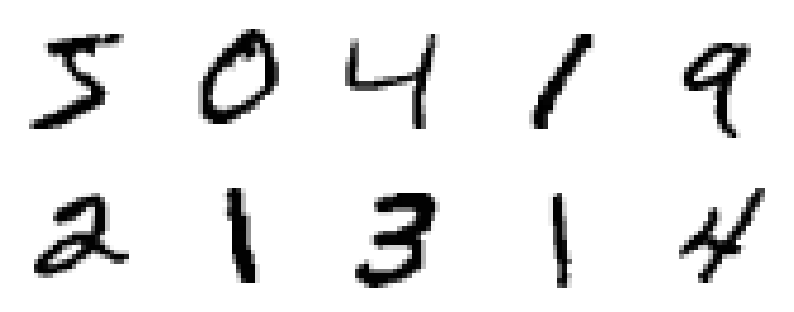

In [120]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

Firstly, I need to normalize the images and flatten them into a one-dimensional vector

In [221]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255 

Using one-hot encoding, I transform the labels into binary vectors

In [222]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [123]:
from keras import models
from keras import layers

I created a Sequential model and added two layers:
- A Dense layer with 512 neurons and ReLU activation, which learns complex patterns from the input
- A Dense output layer with 10 neurons and softmax activation, used for multiclass classification (digits from 0 to 9)

In [261]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add (layers.Dense(10, activation='softmax'))

Model compilation:

In [262]:
network.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [263]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8708 - loss: 0.4426
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9660 - loss: 0.1181
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9772 - loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9852 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9892 - loss: 0.0385


In [264]:
test_loss, test_acc =network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9773 - loss: 0.0783


The model showed good accuracy on the test dataset

In [128]:
network.save('my_model.keras')

In [267]:
model = keras.models.load_model('my_model.keras')

I want to test this model on my own handwritten digits. For this, I created a function that takes the image path, processes the image, and displays the result

In [268]:
import cv2
def image_prediction(paths):
    n = len(paths)
    cols = 4
    rows = (n + cols - 1) // cols  # rounding up
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

    for i, path in enumerate(paths):
        # Image processing
        image = 255 - cv2.imread(path, 0)
        image = cv2.resize(image, (28, 28))
        image = image.astype('float32') / 255
        reshaped = image.reshape(1, 28*28)

        pred = list(model.predict(reshaped)[0])
        predicted_digit = pred.index(max(pred))

        ax = axes.flat[i]
        ax.imshow(image, cmap='binary')
        ax.set_title(f'Prediction: {predicted_digit}')
        ax.axis('off')

    # Clear empty subplots
    for j in range(i + 1, rows * cols):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


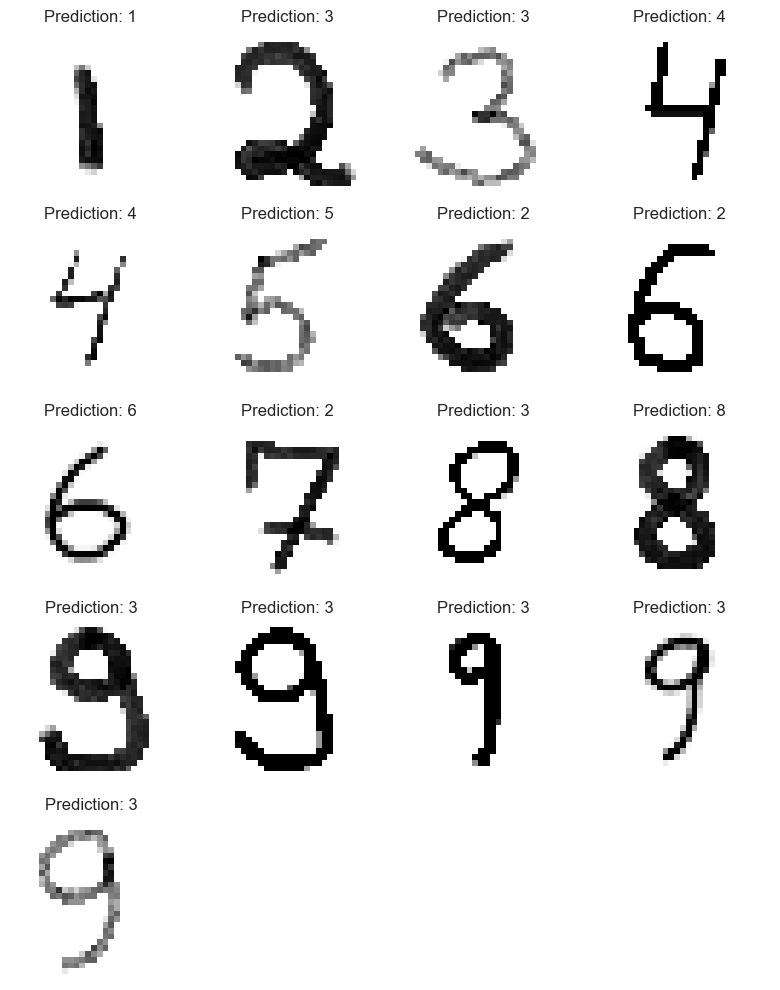

In [269]:
image_paths = [
    r'C:\Users\HP\images_for_lab05\num_1_brush.png',
    r'C:\Users\HP\images_for_lab05\num_2_brush.png',
    r'C:\Users\HP\images_for_lab05\num_3_pencil.png',
    r'C:\Users\HP\images_for_lab05\num_4.png',    
    r'C:\Users\HP\images_for_lab05\num_4_brush.png',
    r'C:\Users\HP\images_for_lab05\num_5_pencil.png',
    r'C:\Users\HP\images_for_lab05\num_6_brush.png',
    r'C:\Users\HP\images_for_lab05\num_6.png',
    r'C:\Users\HP\images_for_lab05\num_6_2.png',
    r'C:\Users\HP\images_for_lab05\num_7_brush.png',
    r'C:\Users\HP\images_for_lab05\num_8.png',
    r'C:\Users\HP\images_for_lab05\num_8_brush.png',
    r'C:\Users\HP\images_for_lab05\num_9_brush.png',
    r'C:\Users\HP\images_for_lab05\num_9.png',
    r'C:\Users\HP\images_for_lab05\num_9_2.png',
    r'C:\Users\HP\images_for_lab05\num_9_5.png',
    r'C:\Users\HP\images_for_lab05\num_9_pencil.png'
]

image_prediction(image_paths)

As we can see, the model performs worse on my own test images. I suppose this is because the original training dataset consists of uniformly formatted images, while mine may differ in contrast, alignment, or thickness of digits, which affects the model’s performance

# Part 2: Cifar 10

Cifar 10 is a dataset containing 60,000 color images of 32*32 pixels of various objects such as frog, car, horse, etc. in a total of 10 types

In [168]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Let's see what these images look like

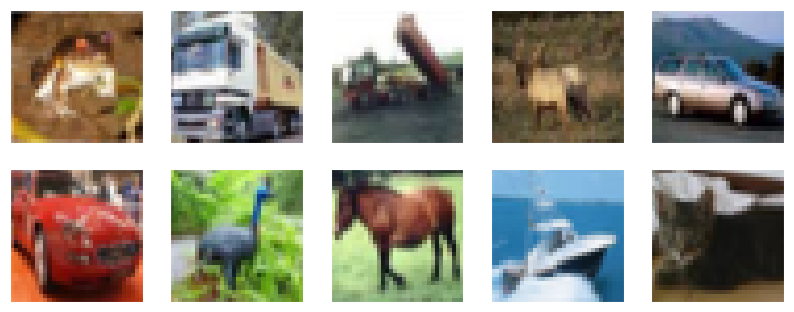

In [133]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [156]:
def cifar_pixel_normalization(train, test, reshape=False):
    if reshape:
        train = train.reshape(x_train.shape[0], 32*32*3)
        test = test.reshape(x_test.shape[0], 32*32*3)
    train = train.astype('float32') / 255
    test = test.astype('float32') / 255
    return train, test

In [171]:
y_test_norm = keras.utils.to_categorical(y_test)
y_train_norm = keras.utils.to_categorical(y_train)

First, I started with a simple model that contains only fully connected Dense layers

In [158]:
model = models.Sequential()

In [159]:
model.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [160]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [161]:
x_train_n, x_test_n = cifar_pixel_normalization(x_train, x_test, True)

model.fit(x_train_n, y_train_norm, epochs = 15, batch_size = 128)
test_loss, test_acc =model.evaluate(x_test_n, y_test_norm)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1929 - loss: 2.2660
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3325 - loss: 1.8460
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3779 - loss: 1.7306
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4051 - loss: 1.6545
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4261 - loss: 1.6083
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4426 - loss: 1.5532
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4579 - loss: 1.5205
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4745 - loss: 1.4730
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4856 - loss: 1.4460
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4907 - loss: 1.4193
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5039 - loss: 1.3886
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 

With this architecture, I managed to achieve only 46% accuracy on the test set

To improve the model, I added convolutional and pooling layers, which are more effective for image data

In [173]:
model = models.Sequential()

In [174]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Initially, I added **two Conv2D layers**. The idea is that the first convolutional layer captures low-level patterns such as edges and textures, while the second layer can detect more complex features based on the output of the first 

After the convolutional layers, I included a **MaxPooling2D layer**. This reduces the spatial dimensions of the data, lowering computational costs and helping to prevent overfitting

I then repeated this block with **64 filters** in the convolutional layers. Using more filters allows the network to learn a greater variety of features as the depth increases

At the end of the convolutional part, I used a Flatten layer to convert the feature maps into a 1D vector, followed by a **Dense layer**

To reduce overfitting, I added a **Dropout layer** with a dropout rate of 0.5, which randomly disables 50% of neurons during training

Finally, I added the **output layer**

In [175]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [176]:
x_train_n, x_test_n = cifar_pixel_normalization(x_train, x_test)
model.fit(x_train_n, y_train_norm, epochs = 20, batch_size = 64)
test_loss, test_acc =model.evaluate(x_test_n, y_test_norm)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3019 - loss: 1.8765
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5249 - loss: 1.3262
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6031 - loss: 1.1182
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6503 - loss: 0.9992
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6841 - loss: 0.9032
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7090 - loss: 0.8334
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7284 - loss: 0.7825
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7417 - loss: 0.7398
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7554 - loss: 0.6911
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7614 - loss: 0.6752
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7732 - loss: 0.6335
Epoch 12/20
782/782 ━━━━━━━━━━

I achieved 75% accuracy on test data

In [ ]:
model.save('cifar_model_75.keras')

In [270]:
model = keras.models.load_model('cifar_model_75.keras')

The next function displays images together with the predicted class labels using the trained model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_23372\980910897.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(f'T:{class_names[int(y[i])]}, P: {class_names[int(predicted_class)]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


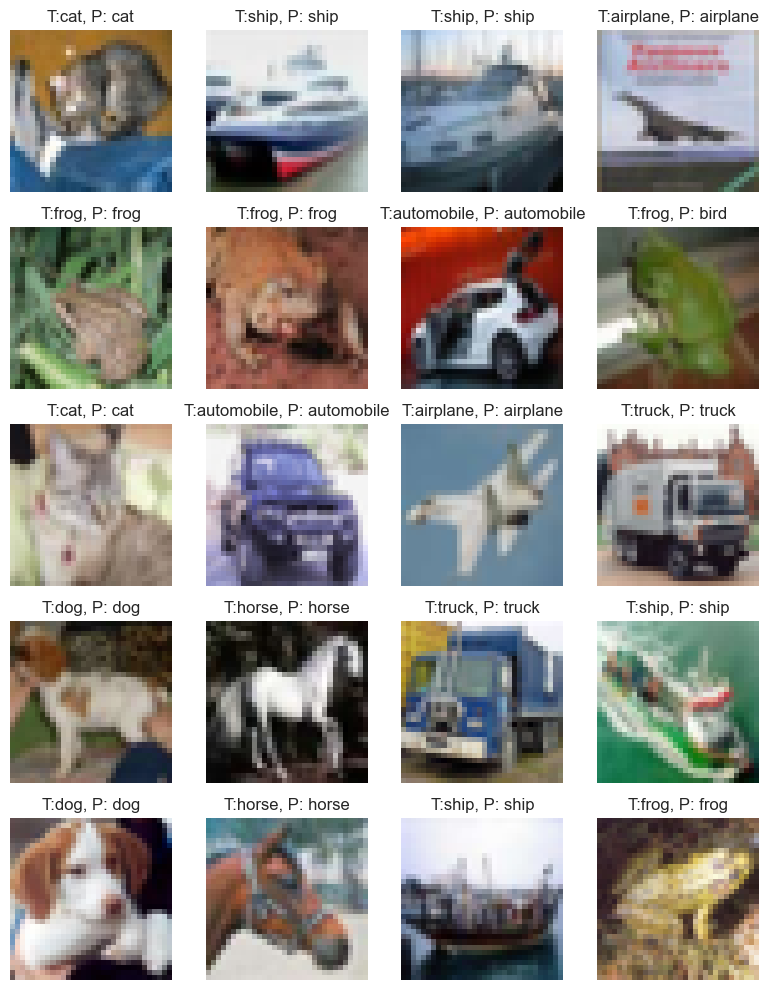

In [271]:
def test_image_prediction(model, x, y, n=5):
    cols = 4
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

    for i in range(n):
        x_n = x.astype('float32') / 255
        image = np.expand_dims(x_n[i], axis=0)
        prediction = list(model.predict(image)[0])
        predicted_class = prediction.index(max(prediction))
        ax = axes.flat[i]
        ax.imshow(x[i])
        ax.set_title(f'T:{class_names[int(y[i])]}, P: {class_names[int(predicted_class)]}')
        ax.axis('off')
        
    for j in range(i + 1, rows * cols):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()
        
test_image_prediction(model, x_test, y_test, 20)

From the result, we see that the model performs quite well

In [218]:
from tensorflow.keras.preprocessing import image

# Function that convert image to cifar10 image format
def preprocess_to_cifar10_format(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    
    img_array = image.img_to_array(img)
    
    img_array = img_array.astype("float32") / 255.0
    
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

img = preprocess_to_cifar10_format(r'C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearning\lab05_neural_networks\images\ship_1.png')